In [1]:
from google.colab import files
Upload = files.upload()

Saving mnsit_dataset.csv to mnsit_dataset.csv


In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
from sklearn.utils import shuffle
mnist = pd.read_csv("mnsit_dataset.csv")

# data set information
label = mnist.pop('label')

In [30]:
mnist

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
label

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [33]:
def pixel_scale(X):
    return X.astype('float32')/255.0

def prepare_data(X):
    # normalizing data
    X = pixel_scale(X)

    # reshaping 784 pixels into 28x28x1 shape (BW image of 28x28 pixels)
    X = X.values.reshape(-1,28,28,1)
    return X

Digits = prepare_data(mnist)
Target = pd.get_dummies(label)

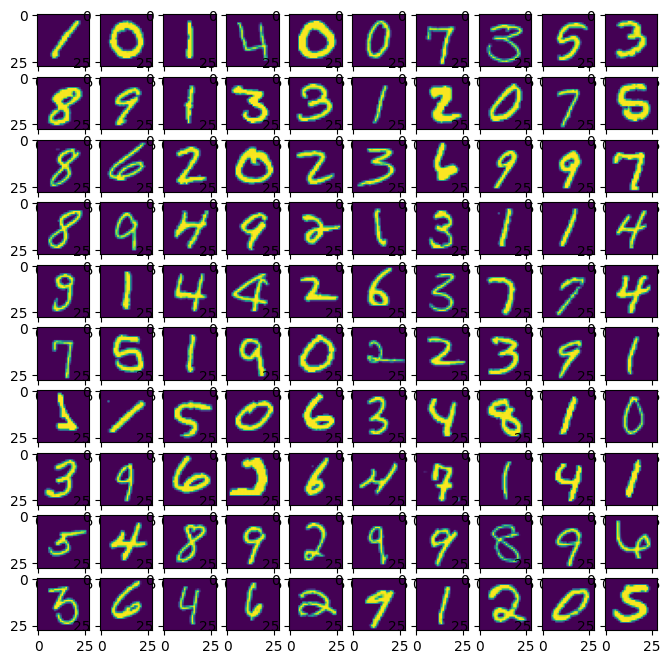

In [35]:
Figure , axes = plt.subplots(10,10,figsize=(8,8))
for i , ax in enumerate(axes.flat):
  ax.imshow(Digits[i])

In [84]:
def define_model():
    model = Sequential(
    [
        # Layer 1
        Conv2D(
            filters=32,
            kernel_size=(3, 3),
            strides=1,
            activation="relu",
            input_shape=(28, 28, 1),
            kernel_regularizer='l2',
        ),
        # Layer 2
        Conv2D(filters=32, kernel_size=(3, 3), strides=1,activation="relu"),

        # Layer 3
#         BatchNormalization(),

#         Activation("relu"),
        MaxPooling2D(pool_size=2, strides=2),
        Dropout(0.25),

        # Layer 3
        Conv2D(
            filters=64,
            kernel_size=3,
            strides=1,
            activation="relu", kernel_regularizer='l2',
        ),

        # Layer 4
        Conv2D(filters=64, kernel_size=3, strides=1, use_bias=False),

        # Layer 5
          BatchNormalization(),

        Activation("relu"),
        MaxPooling2D(pool_size=2, strides=2),
        Dropout(0.25),
        Flatten(),

        # Layer 6
        Dense(units=256, use_bias=False),

        # Layer 7
        BatchNormalization(),

        Activation("relu"),

        # Layer 8
        Dense(units=128, use_bias=False),
        Dense(units=84, use_bias=False),

        Activation("relu"),
        Dropout(0.25),

        # Output
         Dense(units=10, activation="softmax"),
        ]
    )
    return model

In [85]:
Model = define_model()
Model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36864     
                                                     

In [87]:
Model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])
X_train, X_test, Y_train, Y_test = train_test_split(Digits, Target, test_size=0.2, random_state=42,shuffle=True)

In [88]:
X_train.shape

(33600, 28, 28, 1)

In [89]:
Y_train.shape

(33600, 10)

In [91]:
Model.fit(x=X_train, y=Y_train, validation_data=(X_test, Y_test), epochs=10, callbacks=[EarlyStopping(patience=3)])
_ , accuracy = Model.evaluate(X_test, Y_test)
accuracy

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1050/1050 [==============================] - 220s 209ms/step - loss: 0.1455 - accuracy: 0.9682 - val_loss: 0.1127 - val_accuracy: 0.9799
Epoch 2/10
1050/1050 [==============================] - 217s 207ms/step - loss: 0.1252 - accuracy: 0.9729 - val_loss: 0.0774 - val_accuracy: 0.9869
Epoch 3/10
1050/1050 [==============================] - 210s 200ms/step - loss: 0.1213 - accuracy: 0.9760 - val_loss: 0.0696 - val_accuracy: 0.9886
Epoch 4/10
1050/1050 [==============================] - 209s 199ms/step - loss: 0.1098 - accuracy: 0.9782 - val_loss: 0.0729 - val_accuracy: 0.9876
Epoch 5/10
1050/1050 [==============================] - 218s 208ms/step - loss: 0.1093 - accuracy: 0.9777 - val_loss: 0.0975 - val_accuracy: 0.9826
Epoch 6/10
  3/263 [..............................] - ETA: 11s - loss: 0.1164 - accuracy: 0.9792

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


263/263 [==============================] - 13s 51ms/step - loss: 0.0729 - accuracy: 0.9868


0.9867857098579407

In [92]:
accuracy*100.0

98.67857098579407